In [1]:
"""
from google.colab import drive
drive.mount('/content/gdrive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/gdrive')\n"

In [2]:
#%cd /content/gdrive/MyDrive/Colab\ Notebooks/ML

## 1 - Import Libraries

Veri setinin elde edilmesi için keras kütüphanesi,

Matematiksel işlemler ve matrislerin düzenlenmesi için numpy kütüphanesi,

Konvolüsyonel sinir ağının oluşturulması ve eğitilmesi için tensorflow kütüphanesi import edildi.

In [3]:
import numpy as np     # Matematiksel işlemler
import pandas as pd    # Veri setinin düzenlenmesi
import tensorflow as tf  # Sinir ağının kurulması ve eğitilmesi
import matplotlib.pyplot as plt # Grafik çizimi
from sklearn.model_selection import train_test_split # Eğitim ve Test verilerinin ayrıştırılması
from tensorflow.keras.datasets import cifar10  # Veri setini elde etmek için
from tensorflow.keras.utils import to_categorical  # Çıktıların kategorize edilmesi

## 2 - Data Preprocessing

Verinin model tarafından işlenebilecek hale getirilmesi için düzenlenmesi gerekir. 

- İstenen Girdi Formatı:
[Filtre sayısı, Girdi Yüksekliği, Girdi Genişliği, Kanal Sayısı]

Format belirledikten sonra veri seti test,cross_Validation ve train olarak ayrılır.
Aynı zamanda çıktılar 10 sınıftan oluştuğu etiketler one-hot vektöre dönüştürülür.

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
input_shape = [None, 32, 32, 3]
number_of_classes = 10

# Çıktı etiketlerinin one-hot vektöre çevrilmesi
y_train = to_categorical(y_train, number_of_classes)
y_test = to_categorical(y_test, number_of_classes)

## 3 - Dataset Information

CIFAR(Canadian Institute For Advanced Research) veri seti, bilgisayarlı görü(computer vision)
çalışmaları için geliştirilen bir veri setidir. Veri seti Alex Krizhevsky, Vinod Nair ve Geoffrey Hinton
tarafından toplandı. <br/>

CIFAR-10 veri seti 32x32 boyutunda renkli küçük görüntülerden oluşmaktadır. Veri seti 10 sınıf
içermektedir ve sınıf başına 6.000 olmak üzere toplamda 60.000 görüntüden oluşmaktadır.
Bunların 50.000’i eğitim, 10.000’i test için kullanılmaktadır. CIFAR-10 Veri seti şu sınıfları içermektedir:
- Uçak  
- Otomobil
- Kuş
- Kedi
- Geyik
- Köpek
- Kurbağa
- At
- Gemi
- Tır

<img src="https://github.com/zekikus/Tensorflow-CNN-with-CIFAR10-Dataset/blob/master/images/cifar10.jpg?raw=true" style="width:800px;height:500px;">

y =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


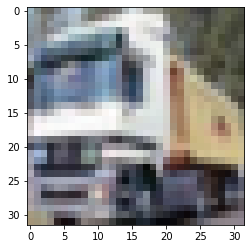

In [6]:
# Veri setinden örnek görüntü ve çıktı
plt.imshow(x_train[1])
print("y = ",y_train[1])

y =  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


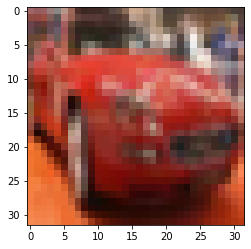

In [7]:
# Veri setinden örnek görüntü ve çıktı
plt.imshow(x_train[5])
print("y = ",y_train[5])

In [8]:
print(f"Shape of training features: {x_train.shape}")
print(f"Shape of training lables: {y_train.shape}")
print(f"Shape of testing features: {x_test.shape}")
print(f"Shape of testing lables: {y_test.shape}")

Shape of training features: (50000, 32, 32, 3)
Shape of training lables: (50000, 10)
Shape of testing features: (10000, 32, 32, 3)
Shape of testing lables: (10000, 10)


In [9]:
## Train - Validation Split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 5000, random_state = 42)

print("Number of examples in Training set: {}".format(x_train.shape[0]))
print("Number of examples in Validation set: {}".format(x_val.shape[0]))

Number of examples in Training set: 45000
Number of examples in Validation set: 5000


In [10]:
## Min - Max Normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## 4 - Convolutional Neural Network

### 4.1 Convolution Layer

Bu bölümde konvolüsyon işleminden ve konvolüsyon katmanından bahsedeceğiz. Konvolüsyon katmanı temelde şu adımlardan oluşur:

- Belirli bir boyuta sahip girdi alır.
- Girdinin her pozisyonuna filtre uygular.
- Belirlenen parametrelere göre farklı veya aynı boyutta bir çıktı verir.

Konvolüsyon işlemi verilen girdi üzerindeki özellik haritalarının keşfedilmesi için kullanılır. Bu özelliklerin doğru bir şekilde keşfedilmesi için filtre boyutu ve adım sayısı gibi parametreler çok önemlidir.

 - **Adım Sayısı(Stride):** Filtre adım sayısını belirtir.
 - **Dış boşluk(Padding):** Filtrele eklenecek dış boşluk sayısını belirtir. Padding genel olarak girdi ile çıktı boyutunun aynı olmasının istendiği durumlarda eklenir.
 - Son olarakta filtre boyutu belirlenir.
 
**Bu Parametreler Nasıl Seçilmeli:** Konvolüsyon katmanında seçilen parametreler sonucu doğrudan etkilemektedir. Adım sayısının ve filtre boyutunun büyük seçilmesi, girdi üzerindeki birçok özelliğin kaybedilmesine neden olabilir. Aynı zamanda adım sayısı ve filtre boyutunun küçük seçilmesi özelliklerin yakalanmasını sağlayabilir fakat hesaplama süresini ve işlem yükünü arttırabilir. Bu nedenlerden dolayı bu parametrelerin doğru bir şekilde seçilmesi çok önemlidir.

Aşağıdaki şekilde tek kanaldan oluşan bir girdi için konvolüsyon işlemi gösterilmektedir.

<img src="https://github.com/zekikus/Tensorflow-CNN-with-CIFAR10-Dataset/blob/master/images/Convolution_schematic.gif?raw=true" style="width:400px;height:300px"/>


**Hatırlatıcı:**
    Konvolüsyon işleminden sonra elde edilecek çıktıların boyutu şu işlemlere göre hesaplanır:

$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $\
    $ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $\
    $ n_C = \text{Konvolüsyonda kullanılan filtre sayısı} $

**2D Convolution:** https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [11]:
from keras.layers import Conv2D

```
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
)
```



### 4.2 Rectifier Linear Unit (ReLu)
- Her konvolüsyon katmanından sonra uygulanır.
- Girdi içerisindeki bütün negatif piksel değerlerini, sıfır ile değiştirir.

<img src="https://github.com/zekikus/Tensorflow-CNN-with-CIFAR10-Dataset/blob/master/images/relu.png?raw=true" style="width:300px;height:200px;">

ReLu, tanh ve eş değelerinden birkaç kat daha hızlı çalışır.<br/><br/>
ReLu'nun daha iyi olmasının nedeni kabaca doyum noktası olmamasıdır(non-saturating). ReLu aktivasyon fonksiyonu f(x) = max(0,x) şeklinde formüle edilir. Yani bütün değerler [0, +sonsuz] aralığındadır.<br/><br/>
Fakat diğer aktivasyon fonksiyonlarına baktığımızda;<br/><br/>
Sigmoid = [0,1] aralığına ve tanh = [-1,1] aralığına noktaları indirger. Çok derin sinir ağlarında bu fonksiyonlar belirli bir noktadan sonra doyuma ulaşır. Fakat ReLu'da durum böyle değildir. Bu yüzden tercih edilir.

**Activation:** https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation



```
tf.keras.layers.Activation(
    activation, **kwargs
)
```



In [12]:
from keras.layers import Activation

### 4.3 Pooling Layer
Havuzlama(Pooling) katmanı, girdinin yüksekliğini ve genişliğini azaltır. Hesaplama yükünü azaltmaya yardımcı olur. Sıklıkla kullanılan iki tür havuzlama(pooling) yöntemi vardır:

- **Max-pooling layer:** Maksimum havuzlama yönteminde, belirli bir adım değerine(stride) göre havuzlama filtresi girdi üzerinde dolaşır ve girdi üzerinde filtrenin bulunduğu alana karşılık gelen kısım içerisindeki maksimum değeri, çıktıda karşılık gelen alana yerleştirir.
- **Average-pooling layer:** Aynı işlem ortalama havuzlama işlemi için de geçerlidir. Fakat bu sefer maksimum eleman yerine girdide filtrenin bulunduğu alana karşılık gelen kısımdaki değerlerin ortalaması çıktı olarak verilir.
<img src="https://github.com/zekikus/Tensorflow-CNN-with-CIFAR10-Dataset/blob/master/images/Stride_2_Max_Avg_Pooling.png?raw=true" style="width:600px;height:300px;"><br/>
<img src="https://github.com/zekikus/Tensorflow-CNN-with-CIFAR10-Dataset/blob/master/images/pooling.gif?raw=true" style="width:400px;height:200px;">

**Hatırlatıcı:**
    Dış boşluk(padding) olmadığı için havuzlama işlemi sonrası elde edilecek çıktı boyutu aşağıdaki formüllere göre hesaplanır. Dikkat edilirse havuzlama işleminden sonra kanal sayısı değişmemektedir. Ayrıca konvolüsyon katmanından farklı olarak havuzlama katmanından öğrenilmesi gereken bir parametre yoktur. Sadece adım sayısı ve filtre boyutu belirlenir. Konvolüsyon işleminde ise filtre katsayıları belirli bir öğrenme algoritmasına göre öğrenilip, güncellenir.

  $ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $\
  $ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $\
  $ n_C = n_{C_{prev}} $\

**Max Pooling 2D:** https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D



```
tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs
)
```



In [13]:
from keras.layers import MaxPooling2D

### 4.4 Fully Connected Layer

Çok katmanlı yapay sinir ağlarında olduğu gibi birbirlerine tamamen bağlı olan nöronları içerir. Daha önceki katmanda öğrenilen özelliklere göre girdinin sınıflandırılması yapılır. 

<img src="https://github.com/zekikus/Tensorflow-CNN-with-CIFAR10-Dataset/blob/master/images/fully_connected.png?raw=true" style="width:600px;height:300px;">

**Dense:** https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense



```
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```



In [14]:
from keras.layers import Dense

### 4.5 Softmax

Softmax fonksiyonu yapay sinir ağı tarafından üretilen skor değerlerini kullanarak olasılık temelli loss değeri üretmektedir. Softmax sonucunda test girdisinin her bir sınıfa ait benzerliği için olasılık değeri üretilir. Yapay sinir ağı modelinin çıktı olarak verdiği skor değerler normalize edilmemiş değerlerdir. Softmax bu değerleri normalize ederek olasılık değerlerine dönüştürmektedir. Olasılık değerine dönüştürme işlemini istatistikte sıkça kullanılan en çok olabilirlik (maximum likelihood) fonksiyonuyla yapmaktadır. Değerler çok büyük değerler olduğu için likelihood fonksiyonun log'nu alarak dağılımın yapısını korumaktadır.
<img src="https://github.com/zekikus/Tensorflow-CNN-with-CIFAR10-Dataset/blob/master/images/softmax.png?raw=true" style="width:600px;height:300px;">

## 5. Create Model

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [16]:
def create_model(input_shape, num_classes):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation = 'relu'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(64, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))

  return model

In [17]:
model = create_model((32, 32, 3), 10)

### 5.1 Train Model

In [18]:
# Adam Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train,
              batch_size=32,
              epochs=10,
              validation_split=0.1)

Epoch 1/10
1266/1266 [==============================] - 15s 8ms/step - loss: 1.8017 - accuracy: 0.3330 - val_loss: 1.4126 - val_accuracy: 0.4782
Epoch 2/10
1266/1266 [==============================] - 7s 5ms/step - loss: 1.5008 - accuracy: 0.4553 - val_loss: 1.2292 - val_accuracy: 0.5549
Epoch 3/10
1266/1266 [==============================] - 6s 5ms/step - loss: 1.3594 - accuracy: 0.5119 - val_loss: 1.1289 - val_accuracy: 0.5947
Epoch 4/10
1266/1266 [==============================] - 6s 4ms/step - loss: 1.2883 - accuracy: 0.5393 - val_loss: 1.0772 - val_accuracy: 0.6078
Epoch 5/10
1266/1266 [==============================] - 6s 5ms/step - loss: 1.2316 - accuracy: 0.5602 - val_loss: 1.0320 - val_accuracy: 0.6369
Epoch 6/10
1266/1266 [==============================] - 6s 4ms/step - loss: 1.1845 - accuracy: 0.5772 - val_loss: 1.0191 - val_accuracy: 0.6422
Epoch 7/10
1266/1266 [==============================] - 6s 4ms/step - loss: 1.1310 - accuracy: 0.5969 - val_loss: 0.9730 - val_accuracy

### 5.2 Evaluate Model

In [20]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.8927 - accuracy: 0.6918
Test loss: 0.8927330374717712
Test accuracy: 0.6917999982833862


### 5.3 Plot Result

In [21]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
tr_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

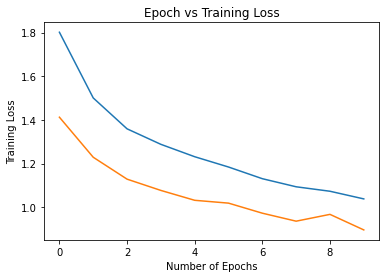

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, label='training_loss')
plt.plot(range(len(val_loss)), val_loss, label='validation_loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.title("Epoch vs Loss")
plt.legend()
plt.show()

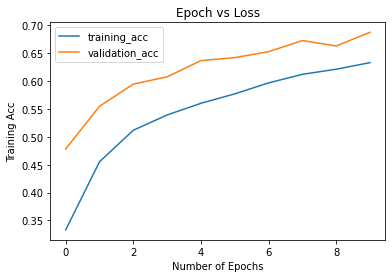

In [33]:
plt.plot(range(len(tr_accuracy)), tr_accuracy, label='training_acc')
plt.plot(range(len(val_accuracy)), val_accuracy, label='validation_acc')
plt.xlabel("Number of Epochs")
plt.ylabel("Training Acc")
plt.title("Epoch vs Loss")
plt.legend()
plt.show()

### 5.4 Prediction

True Label: truck
Predicted Label: truck


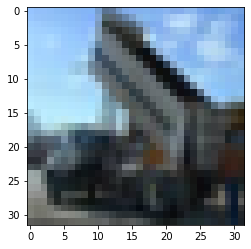

In [32]:
idx = 50
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

prediction = model.predict(x_test)
print("True Label:", labels[np.where(y_test[idx] == 1)[0][0]])
print("Predicted Label:", labels[np.argmax(prediction[idx])])

plt.imshow(x_test[idx])